# Уровень заработной платы

#### **Информация о данных**

Используемый набор данных является выборкой из базы данных переписи населения 1994 года, сделанной Барри Беккером. Датасет содержит следующие признаки:

1. **Возраст** (`age`): отражает возраст респондента (от 17 до 90 лет).
2. **Рабочий класс** (`workclass`): отражает статус занятости респондента.
3. **Оценка уникальности** (`fnlwgt`): отражает примерную оценку количества людей, которое представляет каждая строка данных.
4. **Образование** (`education`): отражает уровень образования респондента.
5. **Ступень образования** (`education-num`): отражает статус образования от дошкольного до докторантуры (от 1 до 16).
6. **Семейное положение** (`marital-status`): отражает семейное положение респондента.
7. **Сфера занятости** (`occupation`): отражает сферу занятости респондента.
8. **Семейная роль** (`relationship`): отражает роль в семье респондента.
9. **Раса** (`race`): отражает расовую принадлежность респондента.
10. **Пол** (`sex`): отражает пол респондента (мужчина, женщина).
11. **Прирост капитала** (`capital-gain`): отражает увеличение капитала у респондента.
12. **Потеря капитала** (`capital-loss`): отражает уменьшение капитала у респондента.
13. **Трудоспособность** (`hours-per-week`): отражает количество отработанных часов за неделю (от 1 до 99).
14. **Страна рождения** (`native-country`): отражает страну, в которой родился респондент.
15. **Зарплата** (`salary`): отражает уровень заработной платы респондента (<=50K, >50K).

#### **Описание задачи**

*Задача заключается в прогнозировании уровеня заработной платы.*

В данной работе требуется проанализировать исходные данные, выяснить какие признаки оказывают наиболее сильное влияние на уровень заработной платы, применить различные алгоритмы классификации, которые смогут предсказывать уровень заработной платы по входным в данным.

> Источник данных: https://www.kaggle.com/datasets/ayessa/salary-prediction-classification


## **1. Чтение данных**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
url = r"C:\Users\79960\МашинноеОбучение_ннгу_2023\salary.csv"
data_raw = pd.read_csv(url)
data_raw.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


## **2. Анализ данных**

In [4]:
dr = data_raw.copy()
dr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
dr.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

*В таблице отсутствуют пропущенные данные числовых признаков!*

In [6]:
dr.shape

(32561, 15)

Для анализа имеем **32561 объекта** и **15 признаков**. Посмотрим на *числовые* и *категориальные* признаки по отдельности.

### **2.1. Числовые признаки**

In [7]:
numeric_parameters = [column for column in dr.columns if dr[column].dtype.name != 'object']
numeric_parameters

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [8]:
data = dr[numeric_parameters]

Имеем **6** числовых признаков. Посмотрим их основные характеристики

In [9]:
dr.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


В таблице представлены основые статистические характеристики:

* Количество (`count`)
* Медиана (`mean`)
* Среднеквадратическое отклонение (`std`)
* Минимум (`min`)
* Квантиль 25%
* Квантиль 50% 
* Квантиль 75% 
* Максимум (`max`)

На данном этапе можно заметить странное распределение в признаках *capital-gain* и *capital-loss*. Скорее всего это связано с тем, что данные признаки равняются нулю для большиства опрошенных. Все остальные характеристики выглядят достаточно правдоподобно.


### **2.2. Категориальные признаки**

Выделим среди всех признаков — категориальные

In [10]:
category_parameters = [column for column in dr.columns if dr[column].dtype.name == 'object']
category_parameters

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'salary']

Имеем **9** категориальных признаков. Рассмотрим распределение каждого из данных признаков.

In [11]:
for col in [column for column in dr.columns if dr[column].dtype.name == 'object']:
    print(f"{col} DISTRIBUTION")
    print(dr[col].value_counts())
    print()

workclass DISTRIBUTION
workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

education DISTRIBUTION
education
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: count, dtype: int64

marital-status DISTRIBUTION
marital-status
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Na

Просматривая полученные значения, можно заметить, что среди категориальных признаков **workclass**, **occupation**, **native-country** имеются пропущенные данные, которые обозначаются **' ?'**. Произведем замену данных значений на NaN (Not a Number).

In [12]:
dr['workclass'].replace(' ?', np.nan, inplace=True)
dr['occupation'].replace(' ?', np.nan, inplace=True)
dr['native-country'].replace(' ?', np.nan, inplace=True)

##  **3. Борьба с пропущенными значениями**

Из анализа данных, содержащихся в категориальных признаках, обнаружилось, что в датасете присутствуют пропуски, с которыми нужно как-то побороться. Рассмотрим какие признаки имеют пропущенные значения:

In [13]:
dr.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

Существуют различные способы борьбы с пропусками. Самый примитивный — просто удалить те строки, в которых встречаются пропущенные значения. Так как датасет содержит не особо большое количество строк, то удаление пропущенных данных может привести к неточности дальнейшего исследования, поэтому способом заполнения пропусков будет *поиск наиболее популярных значений среди данного признака.* Посмотрим на часть датасета с пропусками:

In [14]:
dr_with_nan = dr[dr['workclass'].isnull()]
dr_with_nan.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
27,54,NaN,180211,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,NaN,293936,7th-8th,4,Married-spouse-absent,NaN,Not-in-family,White,Male,0,0,40,NaN,<=50K
69,25,NaN,200681,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,NaN,212759,10th,6,Married-civ-spouse,NaN,Husband,White,Male,0,0,2,United-States,<=50K
106,17,NaN,304873,10th,6,Never-married,NaN,Own-child,White,Female,34095,0,32,United-States,<=50K
128,35,NaN,129305,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,<=50K
149,43,NaN,174662,Some-college,10,Divorced,NaN,Not-in-family,White,Female,0,0,40,United-States,<=50K
154,52,NaN,252903,HS-grad,9,Divorced,NaN,Not-in-family,White,Male,0,0,45,United-States,>50K
160,68,NaN,38317,1st-4th,2,Divorced,NaN,Not-in-family,White,Female,0,0,20,United-States,<=50K
187,53,NaN,135105,Bachelors,13,Divorced,NaN,Not-in-family,White,Female,0,0,50,United-States,<=50K


В данной выборке можно разглядеть, что везде, где отсутствует признак workclass, также отсутствует и признак occupation. Возможно между ними имеется некая связь. Поэтому найдем наиболее популярное значение признака **workclass** и затем по найденному значению выберем самое популярное среди **occupation**. Значения для признака **native-country**	заполним аналогично — наиболее популярным.

Найдем самое популярное значение среди признака **workclass**

In [15]:
dr['workclass'].mode()[0]

' Private'

Найдем самое популярное значение среди признака **occupation**, учитывая что *workclass* = *'Private'*

In [16]:
dr['occupation'][dr['workclass'] == dr['workclass'].mode()[0]].mode()[0]

' Craft-repair'

Найдем самое популярное значение среди признака **native-country**

In [17]:
dr['native-country'].mode()[0]

' United-States'

Заменим соответствующие пропуски найденными значениями

In [18]:
dr['workclass'].fillna(dr['workclass'].mode()[0], inplace=True)
dr['occupation'].fillna(dr['occupation'][dr['workclass'] == dr['workclass'].mode()[0]].mode()[0], inplace=True)
dr['native-country'].fillna(dr['native-country'].mode()[0], inplace=True)

In [19]:
dr.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

Мы успешно поборолись с пропущенными значениями, можно переходить к дальнейшему исследованию.

##  **4. Визуализация данных**



> В данном разделе мы выполним визуализацию данных, чтобы понять зависимость уровня заработной платы от различных признаков, а также убедиться в наличии или отсутствии выбросов



In [20]:
dr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


*Простроим графическое представление матрицы корреляции*

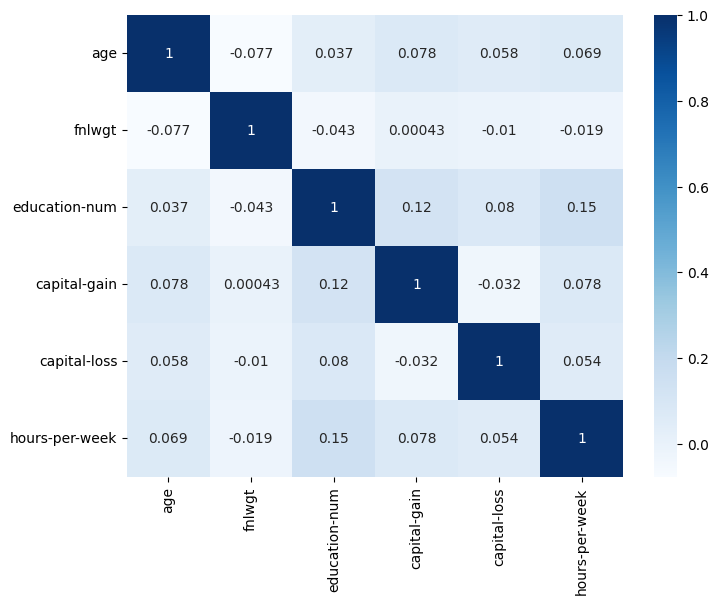

In [21]:
plt.figure(figsize = (8,6))
sb.heatmap(data.corr(), annot=True, cmap='Blues')
plt.show()

Как результат, признаки практически не коррелируют друг с другом.

 



In [22]:
color = ["#3498db","#34495e"]
sb.set_palette(color)

*Посмотрим на какой возраст приходится наибольший заработок*

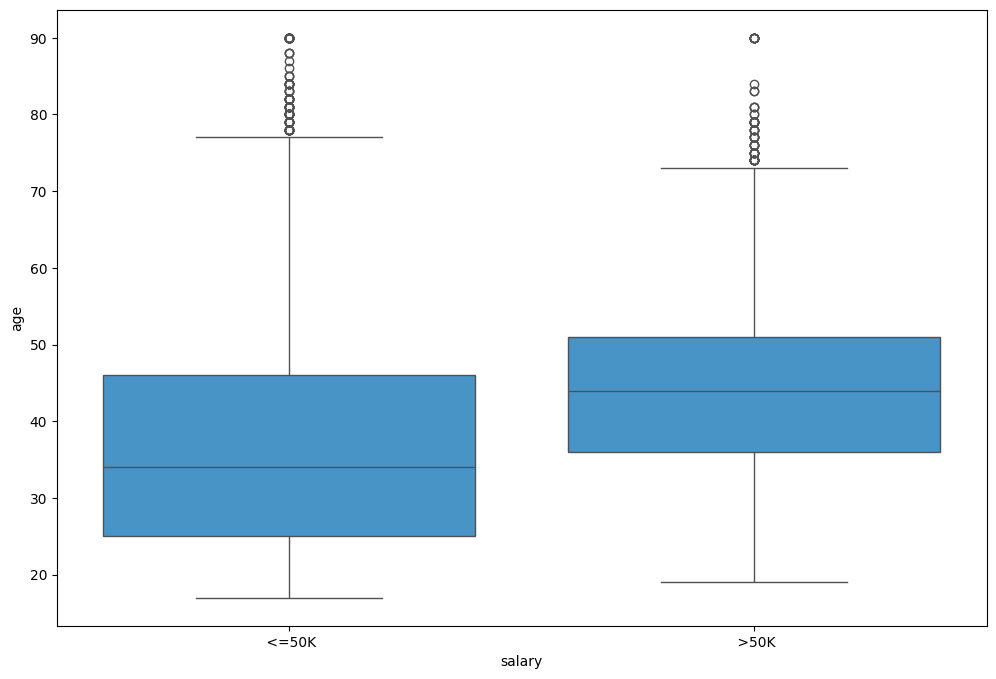

In [23]:
plt.figure(figsize=(12, 8))
sb.boxplot(data=dr, y='age', x='salary')
plt.show()

Можно увидеть, что среди опрошенных, у которых зарплата более 50К, преобладают люди в возрасте примерно от 35 до 50. Зарплату менее 50К получают люди примерно от 25 до 45.

*Посмотрим зависимость заработной платы от характеристики, которая обозначает количество людей со схожими признаками*

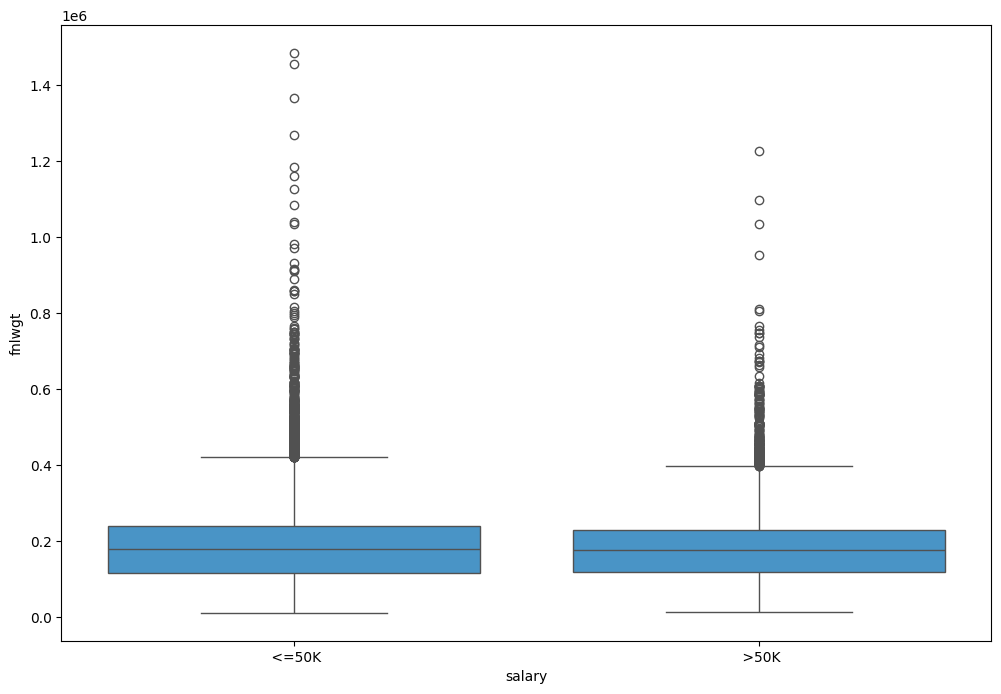

In [24]:
plt.figure(figsize=(12, 8))
sb.boxplot(data=dr, y='fnlwgt', x='salary')
plt.show()

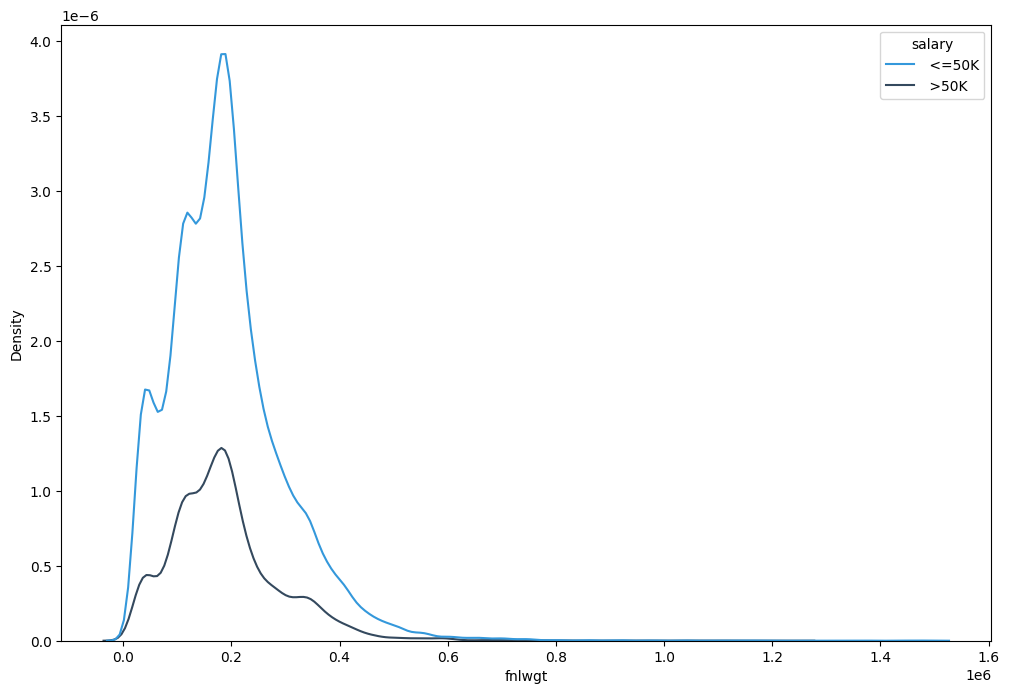

In [36]:
plt.figure(figsize=(12, 8))
sb.kdeplot(data=dr, x='fnlwgt', hue='salary')
plt.show()

Трудно разглядеть зависимость зарплаты от данного признака. Попробуем отбросить его при дальнейшей обработке данных.

*Посмотрим распределение заработной платы по принадлежности к рабочему классу*

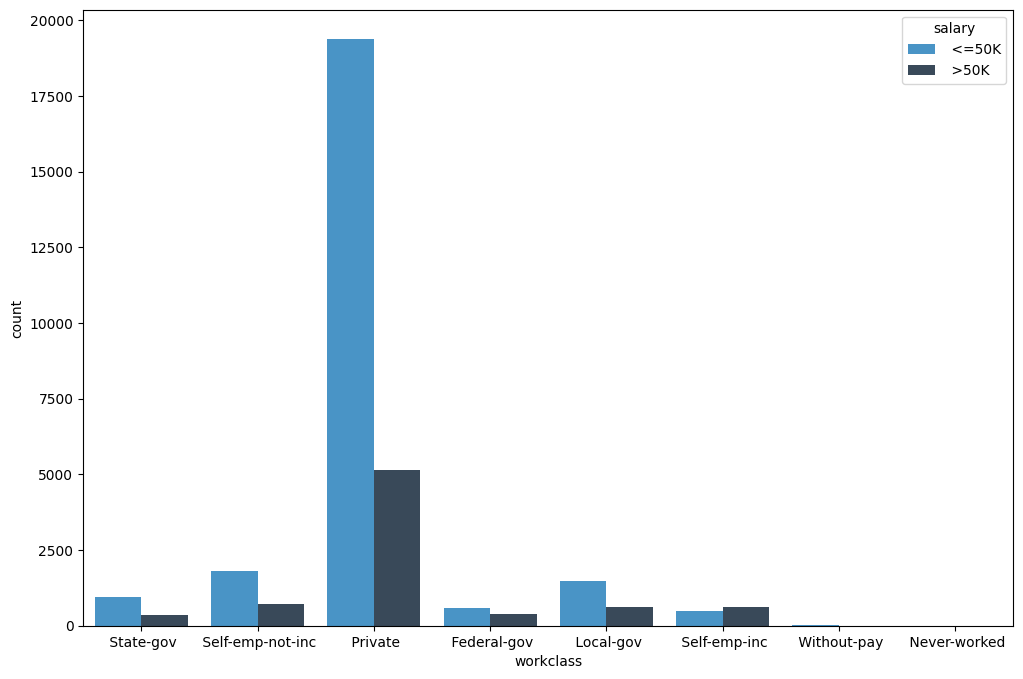

In [25]:
plt.figure(figsize=(12, 8))
sb.countplot(data=dr, x='workclass', hue='salary')
plt.show()

Среди людей рабочего класса можем наблюдать наибольшее количество людей, которые получают зарплату более 50К, кроме того данный класс преобладает и среди тех, кто пролучает зарплату менее 50К. 

*Посмотрим распределение заработной платы среди уровня образования*

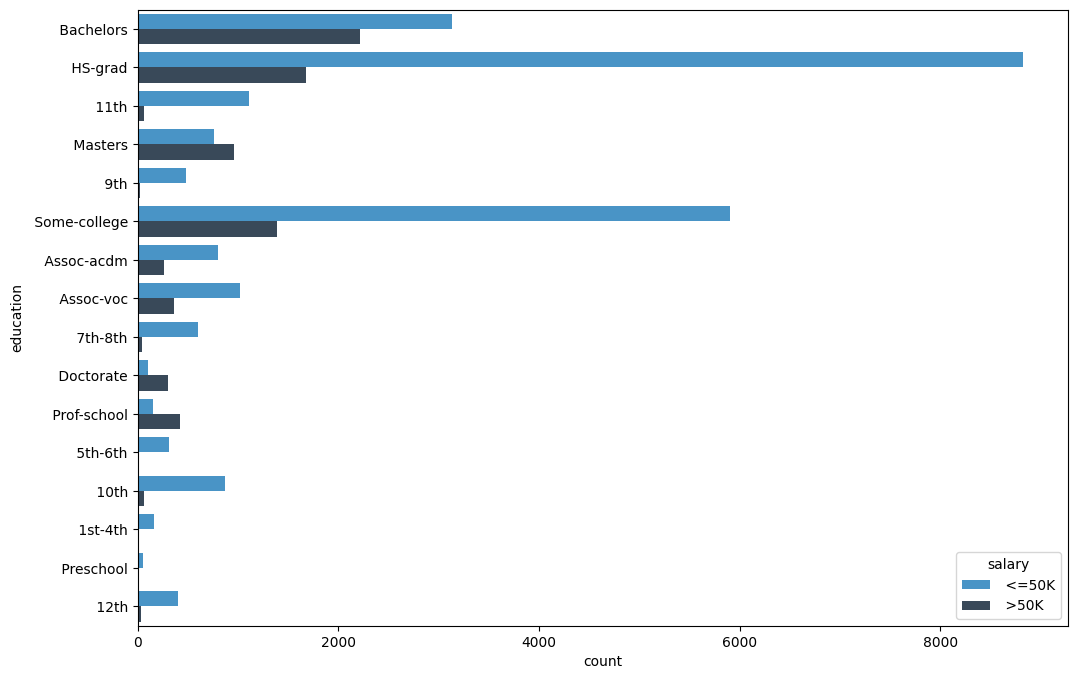

In [26]:
plt.figure(figsize=(12, 8))
sb.countplot(data=dr, y='education', hue='salary')
plt.show()

Очевидно, что уровень образования играет ключевую роль в формировании заработной платы. По графику видно, что большинство тех, кто получает более 50К имеют образование начиная от высшей школы или колледжа и заканчивая магистратурой.

*Посмотрим зависимость заработной платы от семейного положения*

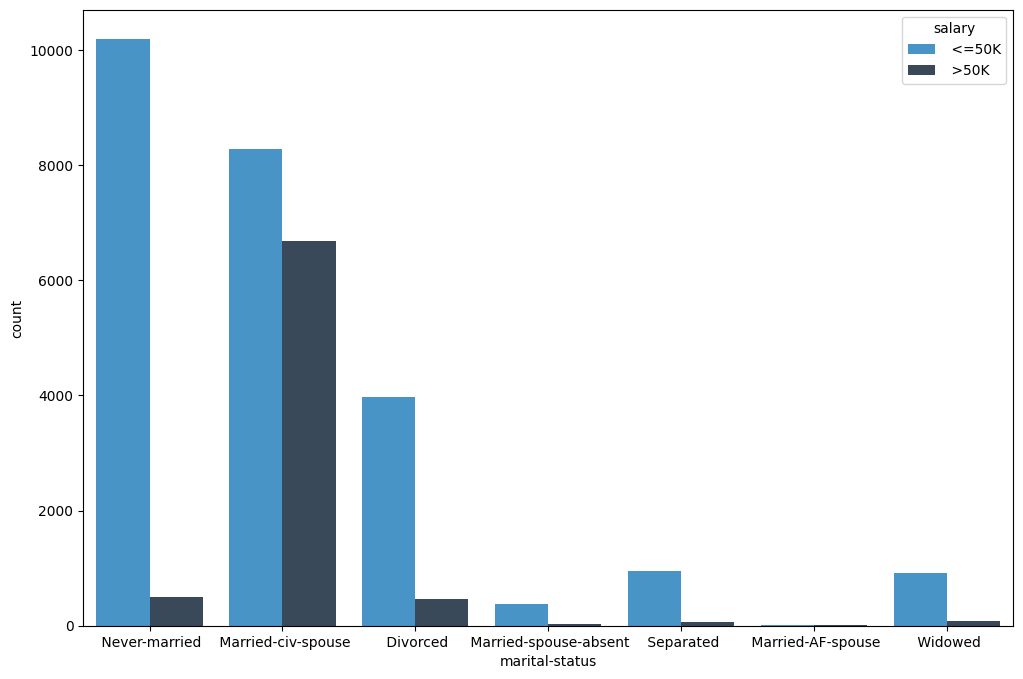

In [27]:
plt.figure(figsize=(12, 8))
sb.countplot(data=dr, x='marital-status', hue='salary')
plt.show()

Большинство тех, кто хорошо зарабатывает, находится в гражданском браке.

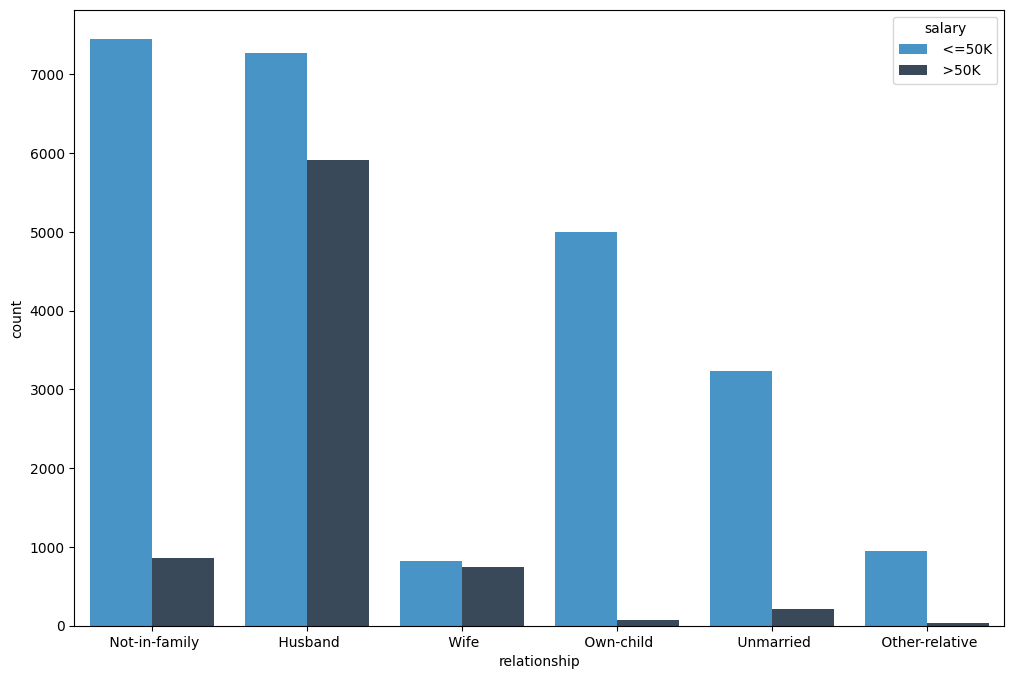

In [28]:
plt.figure(figsize=(12, 8))
sb.countplot(data=dr, x='relationship', hue='salary')
plt.show()

В основном высоким заработком может похвастаться только мужчина.

*Посмотрим зависимость заработной платы от расы*

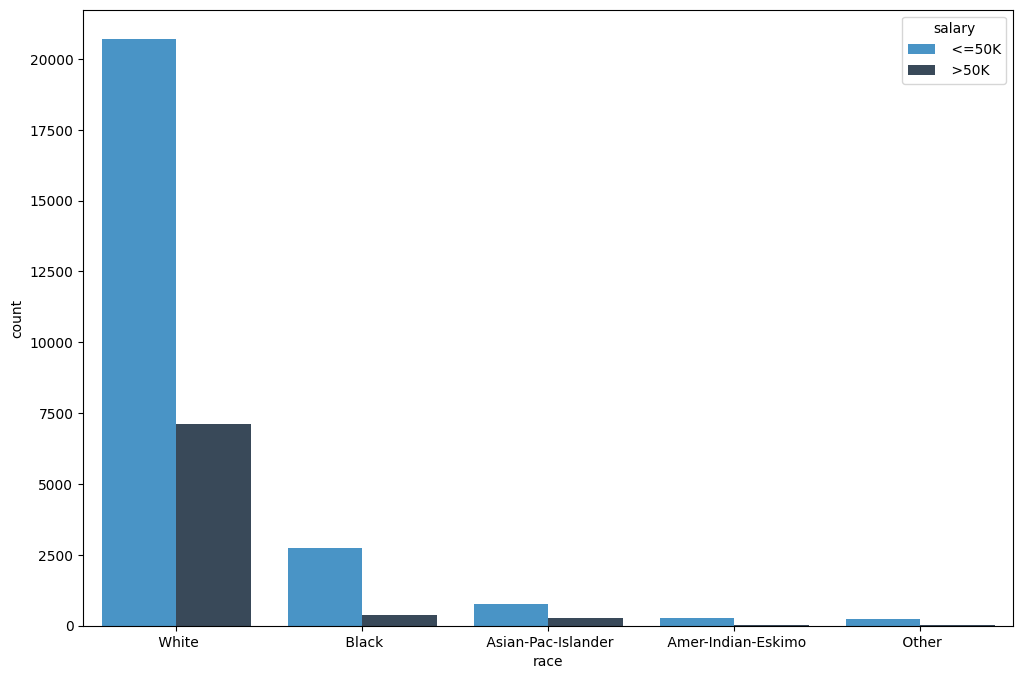

In [29]:
plt.figure(figsize=(12, 8))
sb.countplot(data=dr, x='race', hue='salary')
plt.show()

Хороший заработок в основном характерен для людей «белой расы».

*Посмотрим зависимость заработной платы от пола*

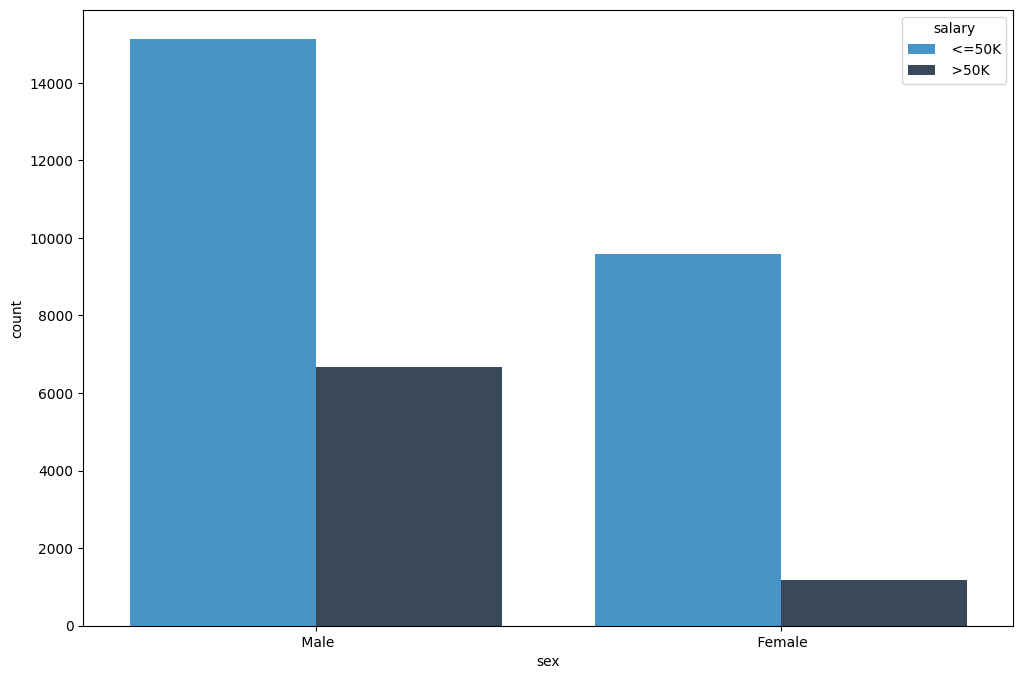

In [30]:
plt.figure(figsize=(12, 8))

sb.countplot(data=dr, x='sex', hue='salary')
plt.show()

Высокий заработок преобладает среди мужчин.

*Посмотрим зависимость заработной платы от прироста или потери капитала*

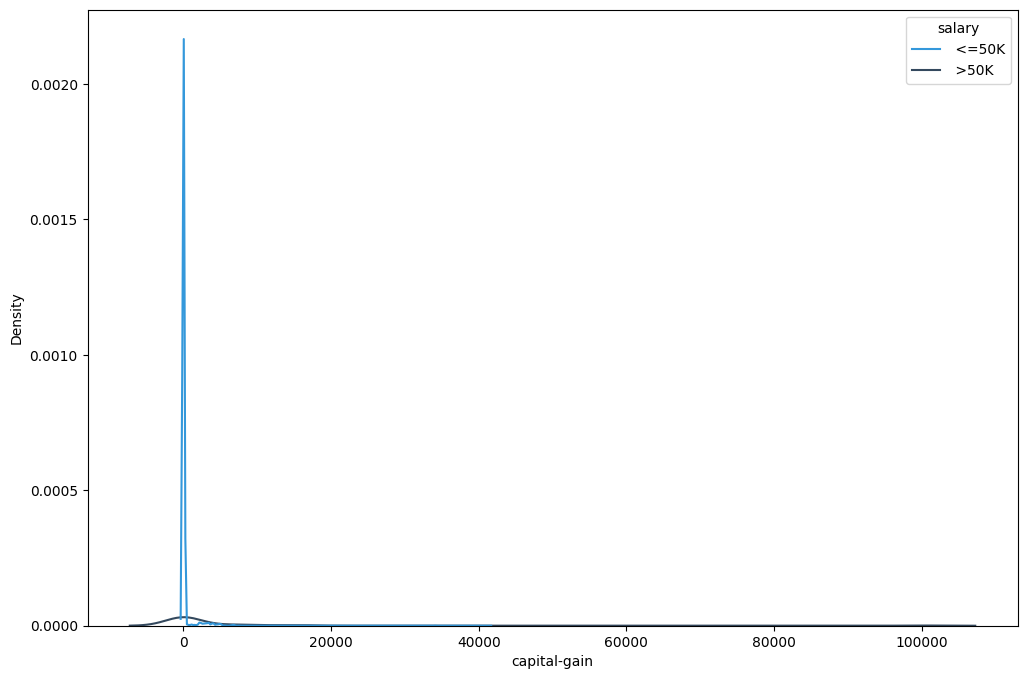

In [31]:
plt.figure(figsize=(12, 8))
sb.kdeplot(data=dr, x='capital-gain', hue='salary')
plt.show()

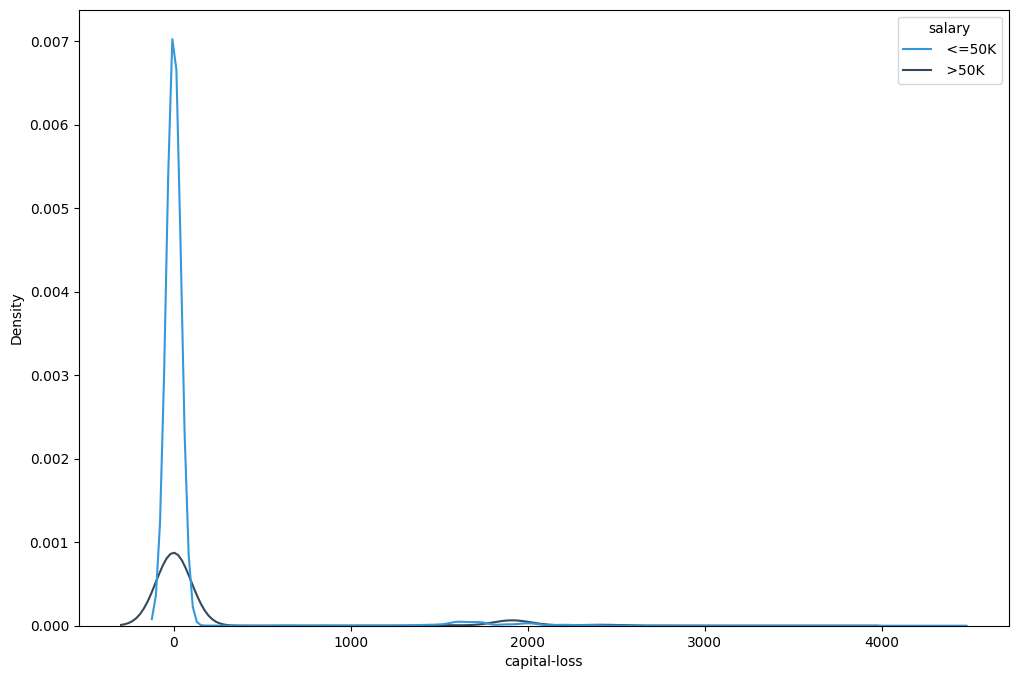

In [44]:
plt.figure(figsize=(12, 8))
sb.kdeplot(data=dr, x='capital-loss', hue='salary')
plt.show()

По графикам можно увидеть, что данные характеристики не оказывают никакого влияния на уровень заработной платы, скорее всего потому что для большинства объектов являются нулём, и не смогут быть полезны при обучении модели. В дальнейшем мы удалим эти признаки.

*Посмотрим зависимость заработной платы от количества отработанных часов в неделю*

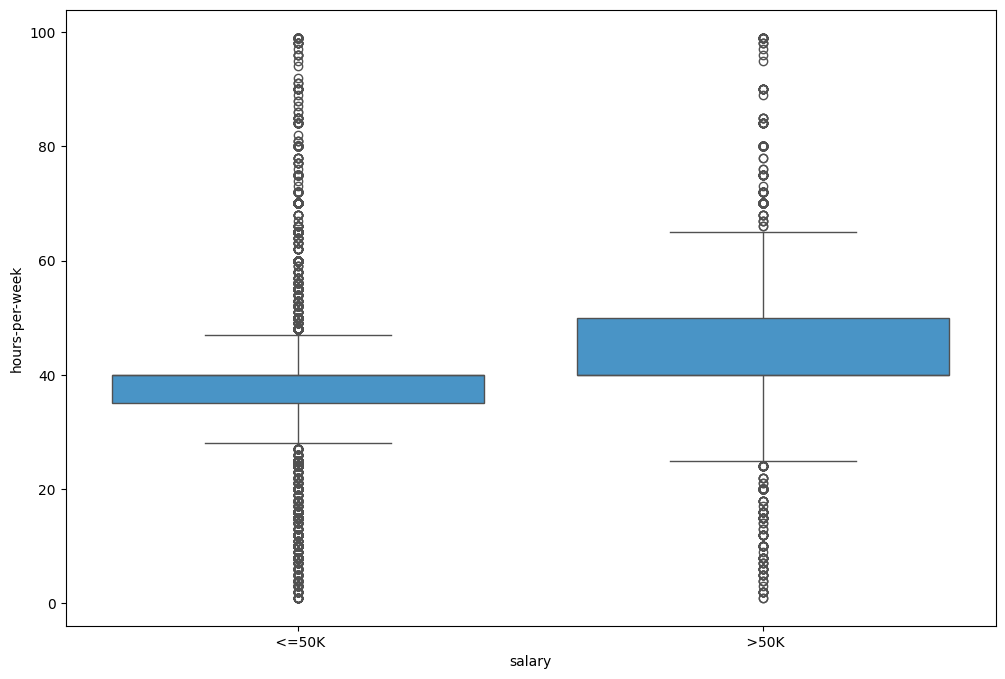

In [32]:
plt.figure(figsize=(12, 8))
sb.boxplot(data=dr, x='salary', y='hours-per-week')
plt.show()

По графикам видно, что работники, которые трудятся более 40 часов в неделю получают зарплату выше, чем те, которые работают менее 40 часов.

##  **5. Обработка данных**

> В данном разделе мы выполним предварительную обработку данных, чтобы они стали пригодны для алгоритмов машинного обучения



#### **5.1. Обработка числовых признаков**

In [33]:
numeric_parameters

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

Отбросим числовые признаки, которые имеют слишком большое число выбросов (*capital-gain*, *capital-gain*) или дублируют друг друга (*education-num*)

In [34]:
dr.drop('fnlwgt', axis=1, inplace=True)
dr.drop('education-num', axis=1, inplace=True)
dr.drop('capital-gain', axis=1, inplace=True)
dr.drop('capital-loss', axis=1, inplace=True)

К оставшимся числовым признакам применим **нормализацию**. В данном случае воспользуемся методом `MinMaxScaler()` из библиотеки scikit-learn, который нормализует значения, приводя их к диапазону от 0 до 1

In [35]:
remaining_numeric_parameters = [column for column in dr.columns if dr[column].dtype.name != 'object']
remaining_numeric_parameters

['age', 'hours-per-week']

In [105]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
dr[remaining_numeric_parameters] = scaler.fit_transform(dr[remaining_numeric_parameters])

In [36]:
dr.describe()

,age,hours-per-week
count,32561.000000,32561.000000
mean,38.581647,40.437456
std,13.640433,12.347429
min,17.000000,1.000000
25%,28.000000,40.000000
50%,37.000000,40.000000
75%,48.000000,45.000000
max,90.000000,99.000000


#### **5.2. Обработка категориальных признаков**

In [37]:
category_parameters

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'salary']

Найдем среди категориальных признаков те, которые можно отнести к бинарным и заменим их значения на *0* или *1* соответственно

In [38]:
binary_category_parameters = [column for column in category_parameters if len(dr[column].unique()) == 2]
binary_category_parameters

['sex', 'salary']

In [39]:
for column in binary_category_parameters:
  dr[column] = dr[column].map({dr[column].unique()[0]: 0, dr[column].unique()[1]: 1})

Теперь выберем признаки, которые нельзя классифицировать как бинарные

In [40]:
no_binary_category_parameters = [column for column in category_parameters if column not in binary_category_parameters]
no_binary_category_parameters

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'native-country']

Применим к ним **векторизацию** — каждый из категориальных признаков, который нельзя отнести к бинарным, заменим на столько новых булевых признаков, сколько существует возможных категорий у данного признака). Данную функциональность представляет метод `get_dummies` из библиотеки Pandas.


In [41]:
dr=pd.get_dummies(dr, columns=no_binary_category_parameters, drop_first=True)

In [42]:
dr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 94 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   age                                         32561 non-null  int64
 1   sex                                         32561 non-null  int64
 2   hours-per-week                              32561 non-null  int64
 3   salary                                      32561 non-null  int64
 4   workclass_ Local-gov                        32561 non-null  bool 
 5   workclass_ Never-worked                     32561 non-null  bool 
 6   workclass_ Private                          32561 non-null  bool 
 7   workclass_ Self-emp-inc                     32561 non-null  bool 
 8   workclass_ Self-emp-not-inc                 32561 non-null  bool 
 9   workclass_ State-gov                        32561 non-null  bool 
 10  workclass_ Without-pay            

##  **6. Борьба с несбалансированностью классов** 

> В данном разделе мы ликвидируем несбалансированность классов

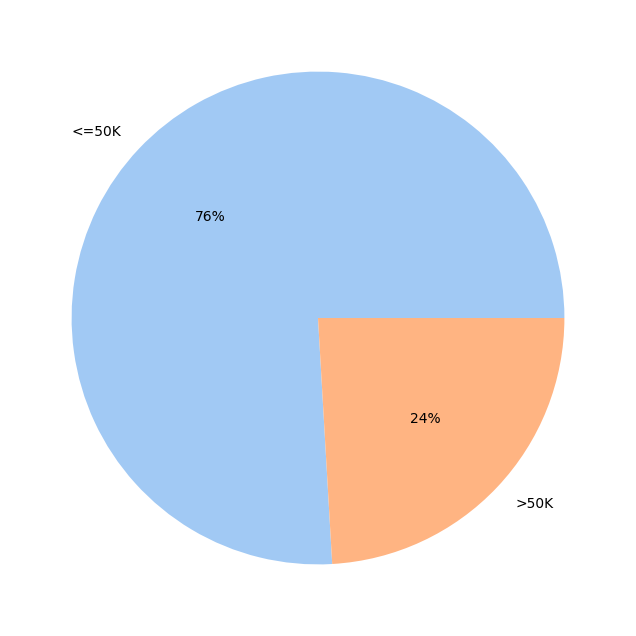

In [44]:
plt.figure(figsize=(8, 8))
colors = sb.color_palette('pastel')
labels = ['<=50K', ">50K"]
plt.pie([dr['salary'].value_counts()[0], dr['salary'].value_counts()[1]], labels=labels, colors=colors, autopct='%.0f%%')
plt.show()

Ликвидируем дисбаланс при помощи метода увеличения числа примеров миноритарного класса (*Synthetic Minority Over-sampling Technique*).

In [48]:
conda install -c conda-forge imbalanced-learn

Retrieving notices: ...working... done
Note: you may need to restart the kernel to use updated packages.

Solving environment: ...working... done

## Package Plan ##

  environment location: D:\anaconda3

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    archspec-0.2.2             |     pyhd8ed1ab_0          41 KB  conda-forge
    ca-certificates-2023.11.17 |       h56e8100_0         151 KB  conda-forge
    certifi-2023.11.17         |     pyhd8ed1ab_0         155 KB  conda-forge
    conda-23.10.0              |   py39hcbf5309_1         941 KB  conda-forge
    conda-libmamba-solver-23.11.1|     pyhd8ed1ab_0          46 KB  conda-forge
    fmt-9.1.0                  |       h6d14046_0         191 KB
    imbalanced-learn-0.11.0    |     pyhd8ed1ab_0         138 KB  conda-forge
    joblib-1.3.2               |     pyhd8ed1ab_0         216 KB  



==> WARNING: A newer version of conda exists. <==
  current version: 23.9.0
  latest version: 23.10.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.10.0




In [49]:
from imblearn.over_sampling import SMOTE

In [53]:
X = dr.iloc[:, dr.columns != 'salary']
y = dr['salary']

smote=SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

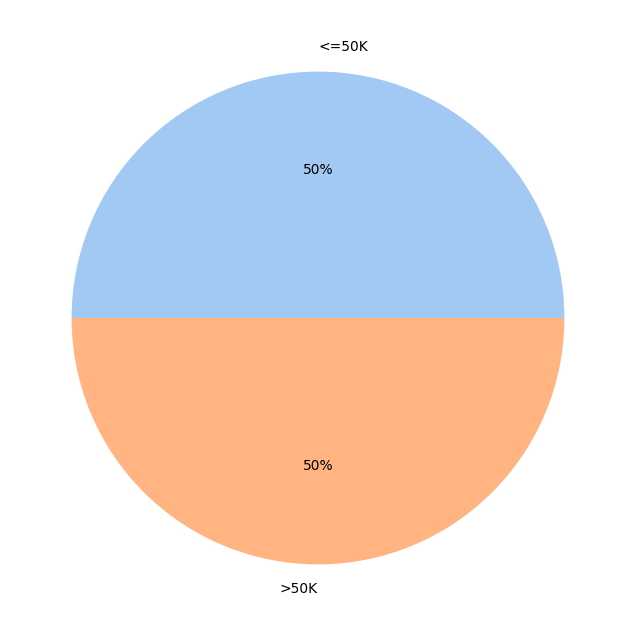

In [54]:
plt.figure(figsize=(8, 8))
colors = sb.color_palette('pastel')
labels = ['<=50K', ">50K"]
plt.pie([y_resampled.value_counts()[0], y_resampled.value_counts()[1]], labels=labels, colors=colors, autopct='%.0f%%')
plt.show()

Теперь классы являются сбалансированными!

##  **7. Разделение данных**

> В данном разделе мы выполним разделение данных на обучающую и тестовую выборки



Разделение будет выполнено в следующем соотношении: **70%** обучающая выборка, **30%** тестовая выборка.

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, shuffle=True, random_state=17)

In [56]:
X_train.shape[0]

34608

Количество объектов обучающей выборки = **34608**

In [57]:
X_test.shape[0] 

14832

Количество объектов тестовой выборки = **14832**

##  **8. Классификация**

> В данном разделе мы запустим различные классификаторы, чтобы сравнить получаемые показатели точности и ошибки предсказания



In [58]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

###  **8.1. KNN**

In [59]:
from sklearn.neighbors import KNeighborsClassifier

Выполним подбор параметра **K** (*число ближайших соседей*) для того, чтобы выбрать наиболее лучший вариант

In [60]:
# scores = []

# for i in range(1, 31, 2):
#     knn = KNeighborsClassifier(n_neighbors=i)
#     knn.fit(X_train, y_train)
#     score = knn.score(X_test, y_test)
#     result = [i, score]
#     scores.append(result)

# scores

In [61]:
# max(scores, key=lambda x: x[1])

In [62]:
# knn = KNeighborsClassifier(n_neighbors=max(scores, key=lambda x: x[1])[0])
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

**Обучающая выборка**

In [63]:
y_train_predict = knn.predict(X_train)
knn_accuracy_train = accuracy_score(y_train_predict, y_train)
knn_err_train = 1 - knn_accuracy_train
print(f"Accuracy = {knn_accuracy_train}\nError = {knn_err_train}")

Accuracy = 0.8870203421174295
Error = 0.11297965788257047


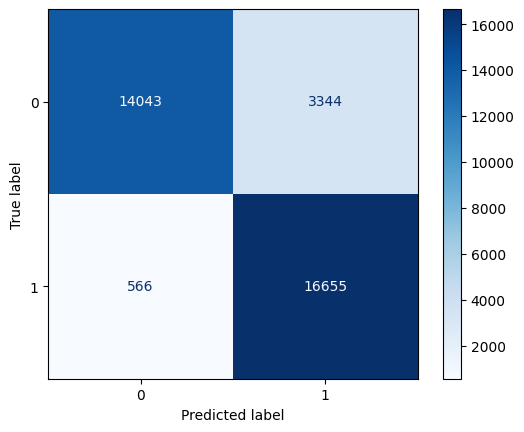

In [64]:
ConfusionMatrixDisplay.from_estimator(knn, X_train, y_train, cmap='Blues')

**Тестовая выборка**

In [65]:
y_test_predict = knn.predict(X_test)
knn_accuracy_test = accuracy_score(y_test_predict, y_test)
knn_err_test = 1 - knn_accuracy_test
print(f"Accuracy = {knn_accuracy_test}\nError = {knn_err_test}")

Accuracy = 0.812230312837109
Error = 0.187769687162891


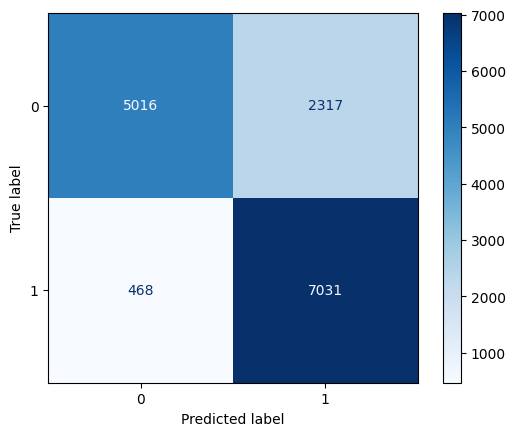

In [66]:
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test, cmap='Blues')

### **8.2. Random Foresеt**


In [67]:
from sklearn.ensemble import RandomForestClassifier

Выполним подбор параметра **n_estimators** (*число деревьев*) для того, чтобы выбрать наиболее лучший вариант

In [68]:
# scores = []

# for i in range(100, 1100, 100):
#     rf = RandomForestClassifier(n_estimators=i)
#     rf.fit(X_train, y_train)
#     score = rf.score(X_test, y_test)
#     result = [i, score]
#     scores.append(result)

# scores

In [69]:
# max(scores, key=lambda x: x[1])

In [72]:
# rf = RandomForestClassifier(n_estimators=max(scores, key=lambda x: x[1])[0])
rf = RandomForestClassifier(n_estimators=800)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=800)

**Обучающая выборка**

In [73]:
y_train_predict = rf.predict(X_train)
rf_accuracy_train = accuracy_score(y_train_predict, y_train)
rf_err_train = 1 - rf_accuracy_train
print(f"Accuracy = {rf_accuracy_train}\nError = {rf_err_train}")

Accuracy = 0.9726652797041146
Error = 0.02733472029588535


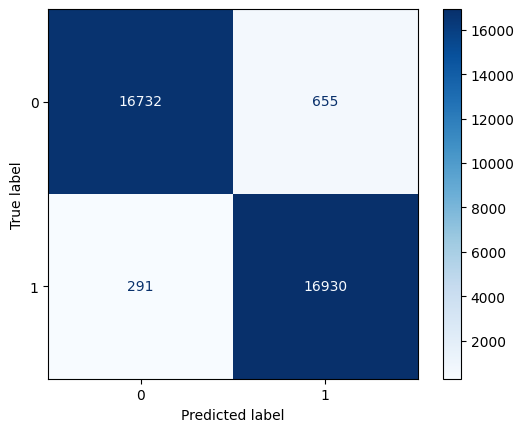

In [74]:
ConfusionMatrixDisplay.from_estimator(rf, X_train, y_train, cmap='Blues')

**Тестовая выборка**

In [75]:
y_test_predict = rf.predict(X_test)
rf_accuracy_test = accuracy_score(y_test_predict, y_test)
rf_err_test = 1 - rf_accuracy_test
print(f"Accuracy = {rf_accuracy_test}\nError = {rf_err_test}")

Accuracy = 0.8648867313915858
Error = 0.13511326860841422


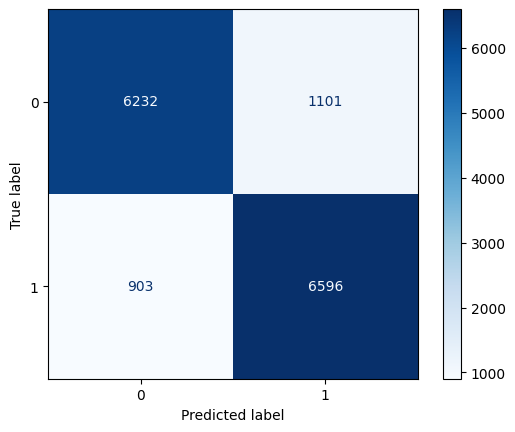

In [76]:
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, cmap='Blues')

### **8.3. Gradient Boosting**

In [77]:
from sklearn.ensemble import GradientBoostingClassifier

Выполним подбор параметра **n_estimators** (*число деревьев*) для того, чтобы выбрать наиболее лучший вариант

In [ ]:
# scores = []

# for i in range(100, 1100, 100):
#     gb = GradientBoostingClassifier(n_estimators=i)
#     gb.fit(X_train, y_train)
#     score = gb.score(X_test, y_test)
#     result = [i, score]
#     scores.append(result)

# scores

In [ ]:
# max(scores, key=lambda x: x[1])

In [78]:
# gb = GradientBoostingClassifier(n_estimators=max(scores, key=lambda x: x[1])[0])
gb = GradientBoostingClassifier(n_estimators=1000)
gb.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=1000)

**Обучающая выборка**

In [79]:
y_train_predict = gb.predict(X_train)
gb_accuracy_train = accuracy_score(y_train_predict, y_train)
gb_err_train = 1 - gb_accuracy_train
print(f"Accuracy = {gb_accuracy_train}\nError = {gb_err_train}")

Accuracy = 0.8833506703652335
Error = 0.11664932963476649


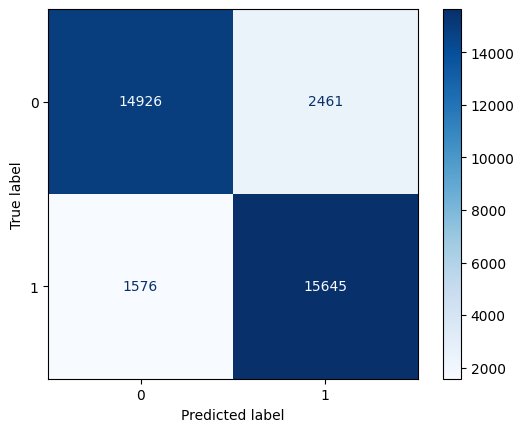

In [80]:
ConfusionMatrixDisplay.from_estimator(gb, X_train, y_train, cmap='Blues')

**Тестовая выборка**

In [81]:
y_test_predict = gb.predict(X_test)
gb_accuracy_test = accuracy_score(y_test_predict, y_test)
gb_err_test = 1 - gb_accuracy_test
print(f"Accuracy = {gb_accuracy_test}\nError = {gb_err_test}")

Accuracy = 0.869066882416397
Error = 0.13093311758360304


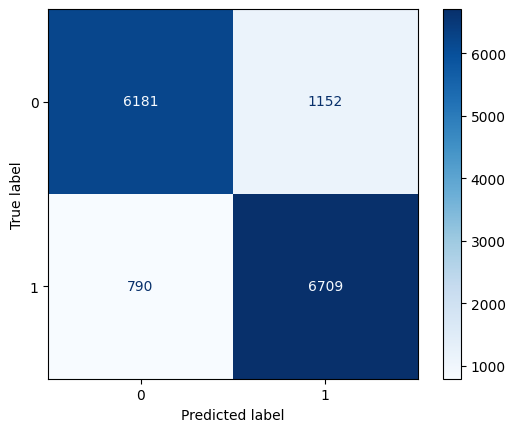

In [82]:
ConfusionMatrixDisplay.from_estimator(gb, X_test, y_test, cmap='Blues')

### **8.4. Logistic Regression**

In [83]:
from sklearn.linear_model import LogisticRegression

In [84]:
lr = LogisticRegression(max_iter=X_train.shape[0])
lr.fit(X_train, y_train)

LogisticRegression(max_iter=34608)

**Обучающая выборка**

In [85]:
y_train_predict = lr.predict(X_train)
lr_accuracy_train = accuracy_score(y_train_predict, y_train)
lr_err_train = 1 - lr_accuracy_train
print(f"Accuracy = {lr_accuracy_train}\nError = {lr_err_train}")

Accuracy = 0.8576629680998613
Error = 0.1423370319001387


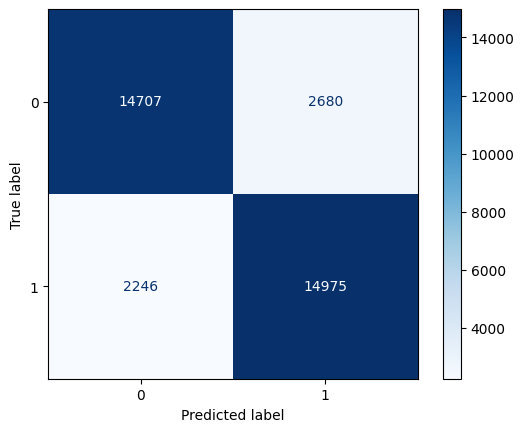

In [86]:
ConfusionMatrixDisplay.from_estimator(lr, X_train, y_train, cmap='Blues')

**Тестовая выборка**

In [87]:
y_test_predict = lr.predict(X_test)
lr_accuracy_test = accuracy_score(y_test_predict, y_test)
lr_err_test = 1 - lr_accuracy_test
print(f"Accuracy = {lr_accuracy_test}\nError = {lr_err_test}")

Accuracy = 0.8595604099244876
Error = 0.14043959007551243


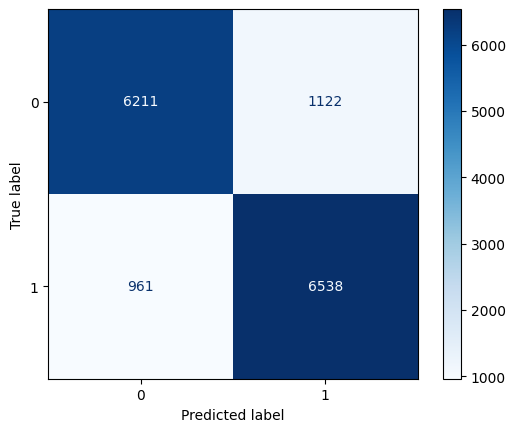

In [88]:
ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test, cmap='Blues')

### **8.5. MLP**

In [89]:
from sklearn.neural_network import MLPClassifier

> **Нейронная сеть с одним скрытым слоем, содержащим 100 нейронов**



Запустим классификатор с параметрами по умолчанию, указав количество нейронов в скрытом слое равным 100

In [90]:
mlp = MLPClassifier(hidden_layer_sizes=(100,), 
                    max_iter=500)
mlp.fit(X_train, y_train)

MLPClassifier(max_iter=500)

**Обучающая выборка**

In [91]:
y_train_predict = mlp.predict(X_train)
print(f"Accuracy = {accuracy_score(y_train_predict, y_train)}\n\
Error = {1-accuracy_score(y_train_predict, y_train)}")

Accuracy = 0.8890718908922792
Error = 0.11092810910772077


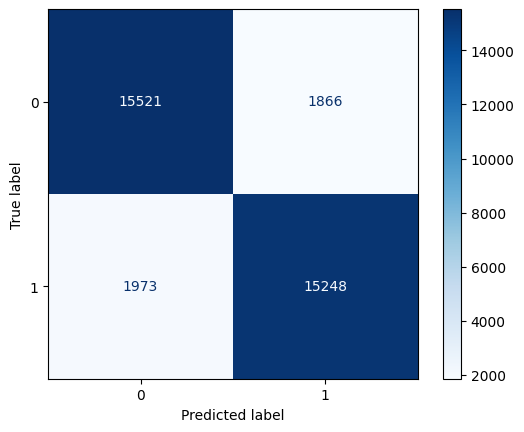

In [92]:
ConfusionMatrixDisplay.from_estimator(mlp, X_train, y_train, cmap='Blues')

**Тестовая выборка**

In [93]:
y_test_predict = mlp.predict(X_test)
print(f"Accuracy = {accuracy_score(y_test_predict, y_test)}\n\
Error = {1-accuracy_score(y_test_predict, y_test)}")

Accuracy = 0.866504854368932
Error = 0.133495145631068


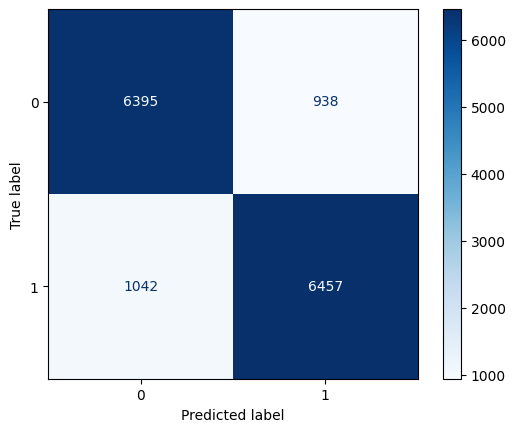

In [94]:
ConfusionMatrixDisplay.from_estimator(mlp, X_test, y_test, cmap='Blues')

Выполним подбор гиперпараметра **α**

In [95]:
train_acc = []
train_err = []
test_acc = []
test_err = []
alpha_arr = np.logspace(-3, 2, 21)

for alpha in alpha_arr:
    model = MLPClassifier(alpha=alpha, 
                          hidden_layer_sizes=(100,), 
                          max_iter=500)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_acc.append(accuracy_score(y_train, y_train_pred))
    train_err.append(np.mean(y_train != y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))
    test_err.append(np.mean(y_test != y_test_pred))

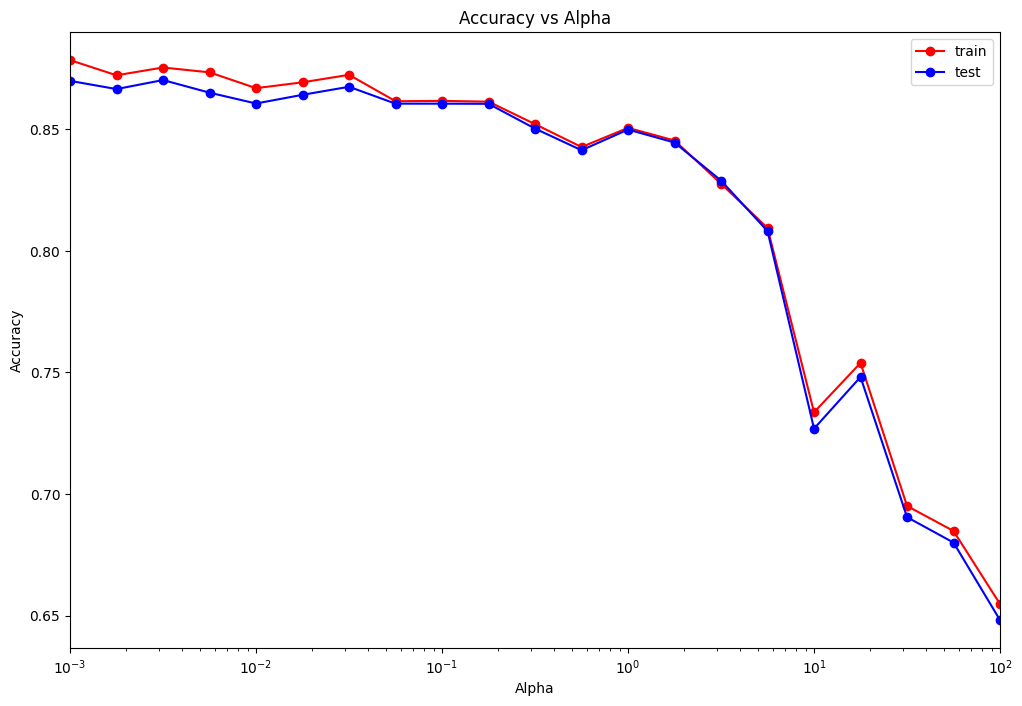

In [96]:
plt.figure(figsize=(12, 8))
plt.semilogx(alpha_arr, train_acc, "r-o", label="train")
plt.semilogx(alpha_arr, test_acc, "b-o", label="test")
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs Alpha')
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.legend()
pass

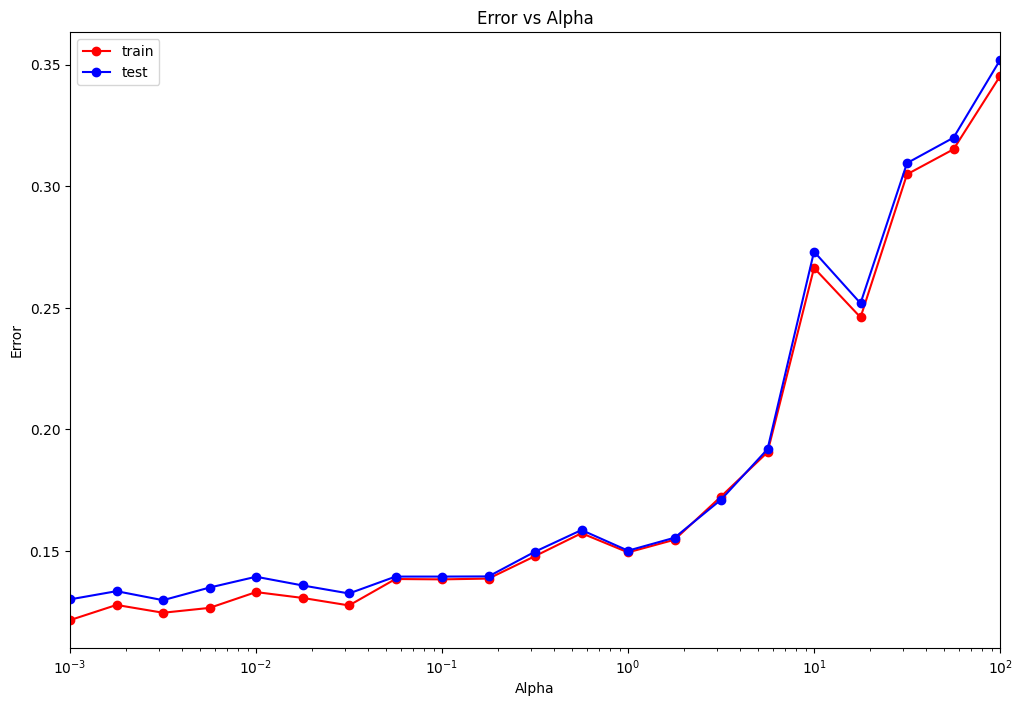

In [97]:
plt.figure(figsize=(12, 8))
plt.semilogx(alpha_arr, train_err, "r-o", label="train")
plt.semilogx(alpha_arr, test_err, "b-o", label="test")
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs Alpha')
plt.xlabel("Alpha")
plt.ylabel("Error")
plt.legend()
pass

Судя по графикам, не наблюдается ни недообучения, ни переобучения. Колебания ошибки и точности происходят достаточно синхронно и в минимальном диапазоне.

In [98]:
optimal_alpha = alpha_arr[test_err == np.min(test_err)][0]
optimal_alpha

0.0031622776601683794

Выполним классификацию с подобранным параметром **α**

In [99]:
mlp_with_alpha = MLPClassifier(alpha=optimal_alpha,
                               hidden_layer_sizes=(100,), 
                               max_iter=500)
mlp_with_alpha.fit(X_train, y_train)

MLPClassifier(alpha=0.0031622776601683794, max_iter=500)

In [100]:
y_train_predict = mlp_with_alpha.predict(X_train)
mlp_accuracy_train = accuracy_score(y_train_predict, y_train)
mlp_err_train = 1 - mlp_accuracy_train
print(f"Accuracy = {mlp_accuracy_train}\nError = {mlp_err_train}")

Accuracy = 0.8676028663892742
Error = 0.1323971336107258


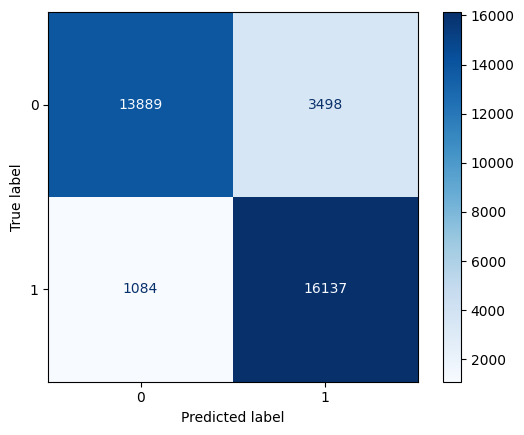

In [101]:
ConfusionMatrixDisplay.from_estimator(mlp_with_alpha, X_train, y_train, cmap='Blues')

In [102]:
y_test_predict = mlp_with_alpha.predict(X_test)
mlp_accuracy_test = accuracy_score(y_test_predict, y_test)
mlp_err_test = 1 - mlp_accuracy_test
print(f"Accuracy = {mlp_accuracy_test}\nError = {mlp_err_test}")

Accuracy = 0.8596952535059331
Error = 0.14030474649406688


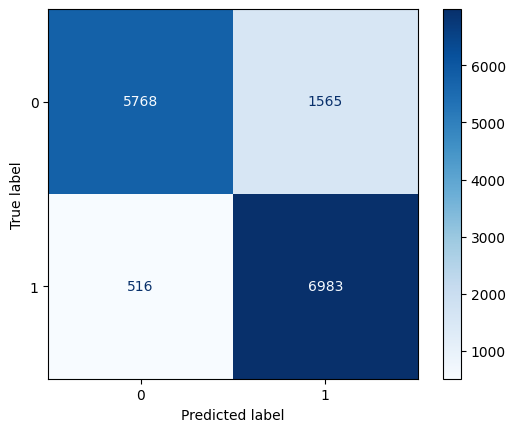

In [103]:
ConfusionMatrixDisplay.from_estimator(mlp_with_alpha, X_test, y_test, cmap='Blues')

### Итоговая таблица

Соберём полученные характеристики точности и ошибки предсказания в итоговую таблицу

In [104]:
index = ['KNeighborsClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier', 'LogisticRegression', 'MLPClassifier']

train_acc_arr = [knn_accuracy_train, rf_accuracy_train, gb_accuracy_train, lr_accuracy_train, mlp_accuracy_train]
test_acc_arr = [knn_accuracy_test, rf_accuracy_test, gb_accuracy_test, lr_accuracy_test, mlp_accuracy_test]
train_err_arr = [knn_err_train, rf_err_train, gb_err_train, lr_err_train, mlp_err_train]
test_err_arr = [knn_err_test, rf_err_test, gb_err_test, lr_err_test, mlp_err_test]

train_acc = pd.Series(train_acc_arr, index, name='Train_Accuracy')
test_acc = pd.Series(test_acc_arr, index, name='Test_Accuracy')
train_err = pd.Series(train_err_arr, index, name='Train_Error')
test_err = pd.Series(test_err_arr, index, name='Test_Error')

pd.concat([train_acc, train_err, test_acc, test_err], axis=1).sort_values(by=['Test_Error'])

,Train_Accuracy,Train_Error,Test_Accuracy,Test_Error
GradientBoostingClassifier,0.883351,0.116649,0.869067,0.130933
RandomForestClassifier,0.972665,0.027335,0.864887,0.135113
MLPClassifier,0.867603,0.132397,0.859695,0.140305
LogisticRegression,0.857663,0.142337,0.859560,0.140440
KNeighborsClassifier,0.887020,0.112980,0.812230,0.187770


##  **Выводы**

В результате проделанной работы можно сделать вывод о том, что классификатор `GradientBoostingClassifier` показал самую высокую точность предсказания — около 88% на тестовой выборке. Абсолютным лидером предсказания на обучающей выборке является `RandomForestClassifier`c ошибкой около 2%, он же занял второе место по точности предсказания на тестовой выборке — около 86%. Самые худшие показатели на обеих выборках у `LogisticRegression`. Стоит отметить, что на протяжении всей работы не наблюдалось ни переобучения, ни недообучения моделей.